# INFO 2950 Project

### Authors: Teddy Klausner, Spencer Pettee, Alexandra Miranda, and Ben Polson

## Hypothesis:

## Data Collection:

In [1]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## load data
data = pd.read_csv("3i-index-data.csv", encoding='latin-1')
data2 = pd.read_csv("annualfoodcapital_clean.csv", encoding='latin-1')

In [2]:
data.head()
data2.head()

,Unnamed: 0,Country,Abreviation,Year,Total Population,GDP,Food_Expenditure_2017
0,780,Algeria,DZA,2016,40551000.0,3916.881571,639.0
1,1851,Argentina,ARG,2016,43508000.0,12654.354999,2306.0
2,2483,Australia,AUS,2016,24263000.0,49896.681101,2927.0
3,2703,Austria,AUT,2016,8747000.0,44731.010855,2273.0
4,2924,Azerbaijan,AZE,2016,9736000.0,3880.738731,896.0


To start our data cleaning we started by gathering a general sense of what the data by creating a few plots.

In [3]:
data['4.2.1) Privacy regulations / Qualitative rating 0-2, 2=best'].corr(data['1.1.1) Internet users / % of households'])

0.45332724160275384

(array([ 2.,  5.,  6.,  7., 10.,  5.,  5.,  2.,  3.,  3.,  3.,  5.,  1.,
         3.,  6.,  9., 12., 16.,  7.,  9.]),
 array([  0.3  ,   5.285,  10.27 ,  15.255,  20.24 ,  25.225,  30.21 ,
         35.195,  40.18 ,  45.165,  50.15 ,  55.135,  60.12 ,  65.105,
         70.09 ,  75.075,  80.06 ,  85.045,  90.03 ,  95.015, 100.   ]),
 <BarContainer object of 20 artists>)

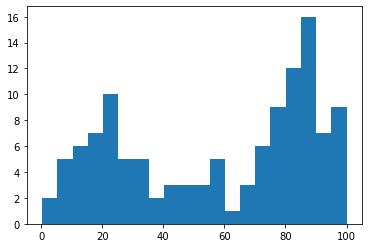

In [4]:
plt.hist(data['1.1.1) Internet users / % of households'], bins=20)

(array([ 3.,  9.,  7.,  8., 15., 11., 21., 14., 17.,  4.,  2.,  4.,  0.,
         3.,  1.]),
 array([34.        , 38.13333333, 42.26666667, 46.4       , 50.53333333,
        54.66666667, 58.8       , 62.93333333, 67.06666667, 71.2       ,
        75.33333333, 79.46666667, 83.6       , 87.73333333, 91.86666667,
        96.        ]),
 <BarContainer object of 15 artists>)

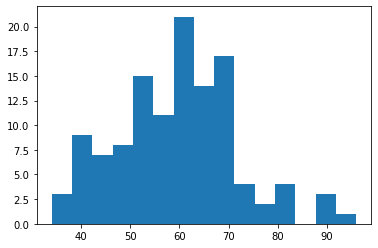

In [5]:
plt.hist(data['3.2.7) Value of e-Commerce / %'], bins=15)

In [6]:
#plt.scatter(data['4.2.2) Trust in online privacy / %'],data[], alpha=.5)

In [7]:
#data['4.2.2) Trust in online privacy / %'].corr(data[''])

To gather a better sense of each column we observed each one's description.

In [8]:
for c in data:
    col = data[c]
    print(col.describe(), '\n\n')

count     118
unique    118
top        PT
freq        1
Name: ISO, dtype: object 


count       119
unique      119
top       Sudan
freq          1
Name: Country/Group, dtype: object 


count    119.000000
mean      58.017353
std       31.108138
min        0.300000
25%       24.950000
50%       67.700000
75%       85.900000
max      100.000000
Name: 1.1.1) Internet users / % of households, dtype: float64 


count    119.000000
mean      14.896832
std       13.869953
min        0.030000
25%        1.655000
50%       10.936000
75%       27.840000
max       44.770000
Name: 1.1.2) Fixed-line broadband subscribers / Per 100 inhabitants, dtype: float64 


count    119.000000
mean     106.683218
std       25.049091
min       37.200000
25%       95.800000
50%      115.000000
75%      129.950000
max      130.000000
Name: 1.1.3) Mobile subscribers / Per 100 inhabitants, dtype: float64 


count    119.000000
mean      13.117025
std       15.939568
min      -14.000000
25%        2.050000
50%      

count     119.000000
mean       72.428059
std       184.058350
min         1.300000
25%         9.208500
50%        25.900000
75%        58.100000
max      1385.000000
Name: BG2) Population / Millions, dtype: float64 


count    119.000000
mean      62.304168
std       22.163671
min       13.000000
25%       48.600000
50%       63.200000
75%       80.350000
max      100.000000
Name: BG3) Urban population / % of total population, dtype: float64 


count      119.000000
mean     15786.116992
std      17705.843203
min        280.000000
25%       2275.000000
50%       7750.000000
75%      21785.000000
max      62850.000000
Name: BG4) GNI per capita / US$ per person, dtype: float64 


count    119.000000
mean      38.736546
std        7.019758
min       26.500000
25%       34.100000
50%       37.400000
75%       42.813500
max       63.000000
Name: BG5) GINI coefficient / Score, 0-100; 0 is perfect equality; 100 is perfect inequality, dtype: float64 


count    119.000000
mean       4.231647

Next we decided to make the column names a bit more readable.

In [9]:
new_colnames = [c[c.find(')') + 2:].lower() for c in data.columns]

In [10]:
new_colnames = [c.replace(' ', '_') for c in new_colnames]

In [11]:
new_colnames = [c[:c.find('/')] + '(' + c[c.find('/') + 2:] + ')' for c in new_colnames]

In [12]:
data.columns = new_colnames

In [13]:
data.head()

,s(o),ountry(roup),internet_users_(%_of_households),fixed-line_broadband_subscribers_(per_100_inhabitants),mobile_subscribers_(per_100_inhabitants),gender_gap_in_internet_access_(%_difference),gender_gap_in_mobile_phone_access_(%_difference),average_fixed_broadband_upload_speed_(kbps),average_fixed_broadband_download_speed_(kbps),average_fixed_broadband_latency_(ms),...,internet_users_(population)_(millions),offline_population_(millions),internet_access_gender_gap_(difference_in_percentage_points),mobile_phone_access_gender_gap_(difference_in_percentage_points),internet_users_(percent_of_population)_(%_of_population),male_internet_users_(%_of_male_population),female_internet_users_(%_of_female_population),male_mobile_phone_subscribers_(%_of_male_population),female_mobile_phone_subscribers_(%_of_female_population),total_fixed_line_broadband_subscribers_(number_of_subscriptions)
0,DZ,Algeria,74.4,7.26,121.9,21.7,7.3,2090.0,3990.0,64.0,...,25.16,17.07,13.0,6.0,59.6,60.0,47.0,82.0,76.0,3063835.0
1,AR,Argentina,75.9,19.10,130.0,-5.7,-3.6,7960.0,33960.0,31.0,...,32.64,11.29,-4.0,-3.0,74.3,70.0,74.0,83.0,86.0,8473655.0
2,AU,Australia,86.1,32.22,113.6,2.1,2.2,20030.0,42630.0,24.0,...,21.28,3.31,2.0,2.0,86.5,94.0,92.0,93.0,91.0,7922000.0
3,AT,Austria,88.8,28.35,123.5,2.2,-1.0,16920.0,55030.0,20.0,...,7.80,1.09,2.0,-1.0,87.7,91.0,89.0,96.0,97.0,2521000.0
4,AZ,Azerbaijan,78.2,18.20,103.9,15.0,11.5,23490.0,21200.0,31.0,...,7.94,2.01,12.0,11.0,79.8,80.0,68.0,96.0,85.0,1810474.0


The following list of columns are from the internet dataset. The bolded bullet points are those which we would like to focus on. 

### Interesting Columns

- **Name: 1.1.4) Gender gap in internet access / % difference, dtype: float64**
- Name: 1.1.5) Gender gap in mobile phone access / % difference, dtype: float64
- Name: 1.2.7) Bandwidth capacity / Bit/s per Internet user, dtype: float64 
- **Name: 1.4.1) Urban electricity access / % of population, dtype: float64**
- **Name: 1.4.2) Rural electricity access / % of population, dtype: float64**
- **Name: 2.1.1) Smartphone cost (handset) / Score of 0-100, 100=most affordable, dtype: float64**
- Name: 2.2.1) Average revenue per user (ARPU, annualized) / USD, dtype: float64 
- Name: 3.1.1) Availability of basic information in the local language / Qualitative rating 0-3, 3=best, dtype: float64 
- Name: 4.1.1) Level of literacy / % of population, dtype: float64 
- **Name: 4.1.4) Level of web accessibility / Qualitative rating 0-4, 4=best, dtype: float64**
- Name: 4.2.1) Privacy regulations / Qualitative rating 0-2, 2=best, dtype: float64
- **Name: 4.2.2) Trust in online privacy / %, dtype: float64**
- Name: 4.3.5.1) Technology-neutrality policy for spectrum use / Qualitative rating 0-1, 1=best, dtype: float64 
- Name: BG1) Nominal GDP / USD billions, dtype: float64 
- **Name: BG7) Total electricity access / % of population, dtype: float64**
- Name: BG9) Percentage of schools with Internet access / % of schools, dtype: float64 
- Name: BG10) Global Peace Index / Score, 1-5; 1 = best, dtype: float64 
- Name: BG11) Democracy Index / Score, 0-10; 10 = best, dtype: float64 
- Name: BG15) Internet users (population) / Millions, dtype: float64 
- Name: BG16) Offline population / Millions, dtype: float64 
- **Name: BG17) Internet access gender gap / Difference in percentage points, dtype: float64**
- **Name: BG19) Internet users (percent of population) / % of population, dtype: float64**

We decided to make the names more readable again. 

In [14]:
data = data.rename(columns={"ountry(roup)":"country"})

In [15]:
internet_data = data[['country','gender_gap_in_internet_access_(%_difference)','urban_electricity_access_(%_of_population)',
                 'rural_electricity_access_(%_of_population)', 'smartphone_cost_(handset)_(score_of_0-100,_100=most_affordable)', 
                 'level_of_web_accessibility_(qualitative_rating_0-4,_4=best)', 'trust_in_online_privacy_(%)',
                 'total_electricity_access_(%_of_population)', 'internet_access_gender_gap_(difference_in_percentage_points)', 
                 'internet_users_(percent_of_population)_(%_of_population)']]

In [16]:
data2 = data2.rename(columns={'Country':'country'})

In [17]:
right_merged = pd.merge(internet_data, data2, how="right", on=['country'])

In [18]:
right_merged.shape
right_merged.head

<bound method NDFrame.head of            country  gender_gap_in_internet_access_(%_difference)  \
0          Algeria                                          21.7   
1        Argentina                                          -5.7   
2        Australia                                           2.1   
3          Austria                                           2.2   
4       Azerbaijan                                          15.0   
..             ...                                           ...   
79  United Kingdom                                          -1.1   
80   United States                                           0.0   
81         Uruguay                                           NaN   
82      Uzbekistan                                          26.1   
83         Vietnam                                          13.6   

    urban_electricity_access_(%_of_population)  \
0                                        100.0   
1                                        100.0   
2  

In [19]:
if_data=right_merged.drop(columns=['Unnamed: 0','Abreviation','Year'])
if_data.head()

,country,gender_gap_in_internet_access_(%_difference),urban_electricity_access_(%_of_population),rural_electricity_access_(%_of_population),"smartphone_cost_(handset)_(score_of_0-100,_100=most_affordable)","level_of_web_accessibility_(qualitative_rating_0-4,_4=best)",trust_in_online_privacy_(%),total_electricity_access_(%_of_population),internet_access_gender_gap_(difference_in_percentage_points),internet_users_(percent_of_population)_(%_of_population),Total Population,GDP,Food_Expenditure_2017
0,Algeria,21.7,100.0,100.0,32.0,0.0,46.0,100.0,13.0,59.6,40551000.0,3916.881571,639.0
1,Argentina,-5.7,100.0,85.3,43.9,2.0,60.0,98.8,-4.0,74.3,43508000.0,12654.354999,2306.0
2,Australia,2.1,100.0,100.0,93.6,2.0,52.0,100.0,2.0,86.5,24263000.0,49896.681101,2927.0
3,Austria,2.2,100.0,100.0,68.8,2.0,58.0,100.0,2.0,87.7,8747000.0,44731.010855,2273.0
4,Azerbaijan,15.0,100.0,100.0,22.7,1.0,39.0,100.0,12.0,79.8,9736000.0,3880.738731,896.0


At this point, we decided to start looking at correlations between data points. 

In [20]:
if_data.corr()

,gender_gap_in_internet_access_(%_difference),urban_electricity_access_(%_of_population),rural_electricity_access_(%_of_population),"smartphone_cost_(handset)_(score_of_0-100,_100=most_affordable)","level_of_web_accessibility_(qualitative_rating_0-4,_4=best)",trust_in_online_privacy_(%),total_electricity_access_(%_of_population),internet_access_gender_gap_(difference_in_percentage_points),internet_users_(percent_of_population)_(%_of_population),Total Population,GDP,Food_Expenditure_2017
gender_gap_in_internet_access_(%_difference),1.000000,-0.412414,-0.374405,-0.387435,-0.152838,0.132904,-0.445056,0.924764,-0.624248,0.254934,-0.396405,-0.358075
urban_electricity_access_(%_of_population),-0.412414,1.000000,0.631191,0.323738,0.175074,-0.124005,0.732422,-0.266389,0.427881,-0.050911,0.275550,0.229720
rural_electricity_access_(%_of_population),-0.374405,0.631191,1.000000,0.357396,0.248283,-0.140220,0.964348,-0.280362,0.643978,-0.052775,0.331224,0.330072
"smartphone_cost_(handset)_(score_of_0-100,_100=most_affordable)",-0.387435,0.323738,0.357396,1.000000,0.450875,-0.121537,0.372603,-0.359448,0.590788,-0.110531,0.778159,0.661712
"level_of_web_accessibility_(qualitative_rating_0-4,_4=best)",-0.152838,0.175074,0.248283,0.450875,1.000000,-0.151674,0.270032,-0.097276,0.425808,0.011279,0.441695,0.419633
trust_in_online_privacy_(%),0.132904,-0.124005,-0.140220,-0.121537,-0.151674,1.000000,-0.143471,0.043843,-0.314868,0.409049,-0.149913,-0.212550
total_electricity_access_(%_of_population),-0.445056,0.732422,0.964348,0.372603,0.270032,-0.143471,1.000000,-0.335092,0.667429,-0.075916,0.328975,0.335970
internet_access_gender_gap_(difference_in_percentage_points),0.924764,-0.266389,-0.280362,-0.359448,-0.097276,0.043843,-0.335092,1.000000,-0.502296,0.091709,-0.371567,-0.238277
internet_users_(percent_of_population)_(%_of_population),-0.624248,0.427881,0.643978,0.590788,0.425808,-0.314868,0.667429,-0.502296,1.000000,-0.352788,0.703332,0.663592
Total Population,0.254934,-0.050911,-0.052775,-0.110531,0.011279,0.409049,-0.075916,0.091709,-0.352788,1.000000,-0.144592,-0.241981


More renaming.|

In [21]:
if_data = if_data.rename(columns={'gender_gap_in_internet_access_(%_difference)':'gender_gap',
                                  'urban_electricity_access_(%_of_population)':'urban_elec_access',
                                  'rural_electricity_access_(%_of_population)':'rural_elec_access',
                                  'smartphone_cost_(handset)_(score_of_0-100,_100=most_affordable)':'phone_cost',
                                  'level_of_web_accessibility_(qualitative_rating_0-4,_4=best)':'web_access',
                                  'trust_in_online_privacy_(%)':'privacy_trust',
                                  'total_electricity_access_(%_of_population)':'electric_access',
                                  'internet_access_gender_gap_(difference_in_percentage_points)':'gender_gap_pt',
                                  'internet_users_(percent_of_population)_(%_of_population)':'internet_users',
                                  'Total Population':'total_population',
                                  'GDP':'GDP',
                                  'Food_Expenditure_2017':'food_expenditure'})

In [22]:
if_data.corr()

,gender_gap,urban_elec_access,rural_elec_access,phone_cost,web_access,privacy_trust,electric_access,gender_gap_pt,internet_users,total_population,GDP,food_expenditure
gender_gap,1.000000,-0.412414,-0.374405,-0.387435,-0.152838,0.132904,-0.445056,0.924764,-0.624248,0.254934,-0.396405,-0.358075
urban_elec_access,-0.412414,1.000000,0.631191,0.323738,0.175074,-0.124005,0.732422,-0.266389,0.427881,-0.050911,0.275550,0.229720
rural_elec_access,-0.374405,0.631191,1.000000,0.357396,0.248283,-0.140220,0.964348,-0.280362,0.643978,-0.052775,0.331224,0.330072
phone_cost,-0.387435,0.323738,0.357396,1.000000,0.450875,-0.121537,0.372603,-0.359448,0.590788,-0.110531,0.778159,0.661712
web_access,-0.152838,0.175074,0.248283,0.450875,1.000000,-0.151674,0.270032,-0.097276,0.425808,0.011279,0.441695,0.419633
privacy_trust,0.132904,-0.124005,-0.140220,-0.121537,-0.151674,1.000000,-0.143471,0.043843,-0.314868,0.409049,-0.149913,-0.212550
electric_access,-0.445056,0.732422,0.964348,0.372603,0.270032,-0.143471,1.000000,-0.335092,0.667429,-0.075916,0.328975,0.335970
gender_gap_pt,0.924764,-0.266389,-0.280362,-0.359448,-0.097276,0.043843,-0.335092,1.000000,-0.502296,0.091709,-0.371567,-0.238277
internet_users,-0.624248,0.427881,0.643978,0.590788,0.425808,-0.314868,0.667429,-0.502296,1.000000,-0.352788,0.703332,0.663592
total_population,0.254934,-0.050911,-0.052775,-0.110531,0.011279,0.409049,-0.075916,0.091709,-0.352788,1.000000,-0.144592,-0.241981


In this data set there are a few notable correlations. First, there is a strong positive correlation between food expenditure and phone cost. There is also a strong positive correlation between GDP and phone cost. There is also a stronger correlation between internet users and rural electricity access than internet users and urban electricity access. Finally, there is a strong positive correlation between internet users and phone cost. (shown below via scatter plots) 

## Data Description

**What are the observations (rows) and the attributes (columns)?**

We are using data about internet usage internationally and a separate dataset containing GDP and food expenditure internationally. We combined the two datasets into one where rows are countries and columns of interest from the internet dataset are gender gap in internet access, urban electricity access, rural electricity access, smartphone cost, level of web accessibility, trust in online privacy, total electricity access, internet users. The columns of interest from the other dataset are GDP, and food expenditure.

**Why was this dataset created?**

The internet data set was created to measure four categories of “The Inclusive Internet Index,” which tracks internet services in countries across the world. The four categories are affordability, availability, relevance and readiness. The index is meant for advocacy organizations, local governments and journalists. 

This dataset was created by Our World in Data, which wanted to look at the relationship between GDP per person and food expenditure per person. The data was originally sourced from the World Bank, whose goal is to help countries solve issues. They record many general statistics for nearly every country.

**Who funded the creation of the dataset?**

The internet service dataset was funded by Facebook. The data seems to be funded to support Facebook's internet.org whose mission is to bring internet access to those who do not have it. 

The World Bank funded the creation of the second dataset, and they receive funding from returns on their investments, country membership fees, and donations made by members

**What processes might have influenced what data was observed and recorded and what was not?**

The idea of finding how connected people are is more than just taking a survey of <5,000 people. This information may not be representative of the true experience people have in their country. Lastly there is the issue of having a device that connects to the internet. People may be able to afford internet access, but cannot afford the initial price of buying a device. Although the survey apparently covers 91% of the population, can we be sure of that number? 

For the GDP and food expenditure per person, they are calculated by dividing total GDP and food expenditure by population. The World Bank sources this data from other organizations that are more specific to countries or groups of countries, such as the U.S. Census Bureau. What data was recorded and what wasn’t is determined by how well these organizations sampled and surveyed the population, and also how well the population responded to these surveys.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The data appears to be compiled into a single file with many different columns that measure a variety of metrics about internet service. If the data was from surveys was then compiled into countries. The data also combines some of information into categories like regions (such as North America and others). 

Similarly to the internet data, the food/GDP data was taken from survey within each country. This data was taken from these countries by the World Bank and they compiled all of it into one table.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

Yes the data was collected through a survey which asked 4,953 participants from 99 countries across Asia-Pacific, the Americas, Europe, the Middle East, North Africa and Sub-Saharan Africa. Considering they took a survey they likely knew the data was being collected. The source is unclear about what the participants thought the data was for. 

People were certainly aware of this data collection, and the purpose that the participants expected the data to be used for was not specified online. We would guess that they expect it to be used for general government purposes.

**Where can your raw source data be found, if applicable? Provide a link to the raw data.** 

https://drive.google.com/file/d/1R-GW2DyhUh5zsnOQBfxtm36_PCGUV3Kn/view?usp=sharing

https://drive.google.com/file/d/11-kbLU49T1SuG5k_y8ENJqKn6eAqwlUo/view?usp=sharing

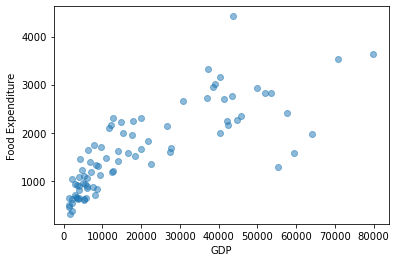

In [23]:
plt.scatter(if_data['GDP'],if_data['food_expenditure'], alpha=0.5)
plt.xlabel('GDP')
plt.ylabel('Food Expenditure')
plt.show()

As we can see the data points between GDP and food expenditure are correlated. From this scatter plot the association appears to be linear with many points in the range of GDP <20,000 and food expenditure <2,000. 

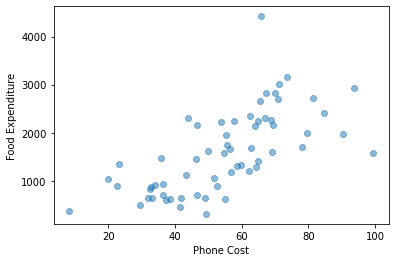

In [24]:
plt.scatter(if_data['phone_cost'],if_data['food_expenditure'], alpha=0.5)
plt.xlabel('Phone Cost')
plt.ylabel('Food Expenditure')
plt.show()

This graph shows the food expenditure as a function of food cost. Again the data appears to have a positive linear correlation with food expenditure increasing as phone cost increases.

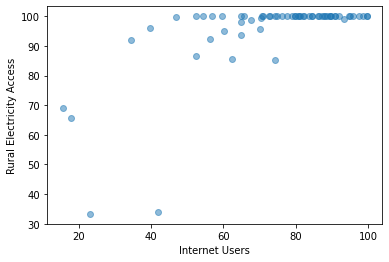

In [25]:
plt.scatter(if_data['internet_users'],if_data['rural_elec_access'], alpha=0.5)
plt.xlabel('Internet Users')
plt.ylabel('Rural Electricity Access')
plt.show()

This graph shows the relationship between Internet Users and Rural Electricity Access. The plot has many of the points clustered in the top right. To gain a better idea of the relationship we can perform a log transformation to attempt to linearize the data.  

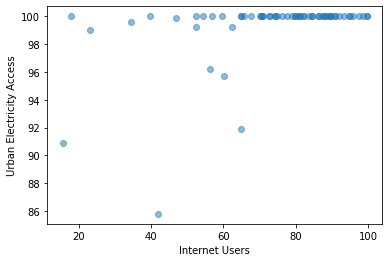

In [26]:
plt.scatter(if_data['internet_users'],if_data['urban_elec_access'], alpha=0.5)
plt.xlabel('Internet Users')
plt.ylabel('Urban Electricity Access')
plt.show()

This final plot is similar to the last in how the data has many points in the top right. We can also perform a log transformation on this plot to try and linearize the data.

## Data Limitations

The data is fairly robust and does not have too many limitations. One limitation is that the data is based around the experiences in each country, but the experiences in both internet and food expenditure can be different within each region of countries. This is especially true for larger countries and countries with vast differences in wealth across  regions. 


## Questions for Review

1. We felt that some of the data analysis we will do in the future is pretty obvious. For example, it makes sense to us that people who spend more on food also tend to have better internet access. How can use the data in an interesting unique way?
2. What additional plots and analysis should we consider for our final analysis (this is a start and we plan to expand greatly? 

## Part 4: Proposed Question 2 analysis 

In [27]:
corr=if_data.corr()
corr_table=corr.loc['food_expenditure',:]
print('Correlation Coefficients of Food Expenditure and Internet Data')
print(corr_table)

Correlation Coefficients of Food Expenditure and Internet Data
gender_gap          -0.358075
urban_elec_access    0.229720
rural_elec_access    0.330072
phone_cost           0.661712
web_access           0.419633
privacy_trust       -0.212550
electric_access      0.335970
gender_gap_pt       -0.238277
internet_users       0.663592
total_population    -0.241981
GDP                  0.794216
food_expenditure     1.000000
Name: food_expenditure, dtype: float64


<AxesSubplot:>

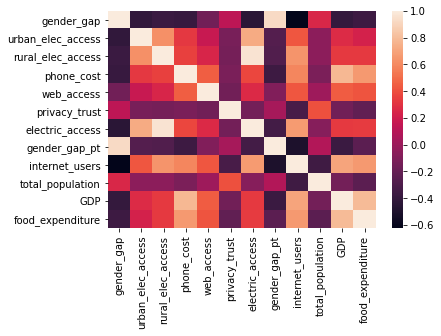

In [28]:
import seaborn as sns
sns.heatmap(if_data.corr())

Based on the correlations listed above and the heatmap, we can conclude that the gender gap and privacy trust have the strongest negative correlation while GDP, phone cost and internet users have the strongest positive correlation with food expenditure. Below are the calculated p-values in comparison to a 0.5 alpha level to determine which correlations are statistically significant. 

In [45]:
#Two Sampled T test for gender gap and food expenditure 

from scipy.stats import ttest_ind
import numpy as np

gendergap=if_data.dropna()['gender_gap']
food_expend=if_data.dropna()['food_expenditure']

ttest, pval=stats.ttest_ind(food_expend, gendergap)

print("p-value", pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

#linregression 
from scipy.stats import linregress 
linregress1=linregress(gendergap, food_expend)
print(linregress1)

#i think a 95% confidence interval is the mean + just std error*1.96
confidence_interval1=1.96*7.709
print(confidence_interval1)

p-value 1.228482350079154e-28
we reject null hypothesis
LinregressResult(slope=-22.90023807569626, intercept=1792.1963688823014, rvalue=-0.35807487369252006, pvalue=0.004269725951199303, stderr=7.7089382962048925)
15.109639999999999


In [38]:
#Two Sampled T test for privacy_trust and food expenditure 

privacy_trust=if_data.dropna()['privacy_trust']
food_expend=if_data.dropna()['food_expenditure']

ttest, pval=stats.ttest_ind(food_expend, privacy_trust)

print("p-value", pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 9.985653993245819e-28
we reject null hypothesis


In [39]:
#Two sampled T test for GDP and Food expenditure 
GDP=if_data.dropna()['GDP']
food_expend=if_data.dropna()['food_expenditure']

ttest, pval=stats.ttest_ind(food_expend, GDP)

print("p-value", pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 6.645215525578133e-13
we reject null hypothesis


In [40]:
#two sampled T test for phone cost and food_expenditure 
phone_cost=if_data.dropna()['phone_cost']
food_expend=if_data.dropna()['food_expenditure']

ttest, pval=stats.ttest_ind(food_expend, phone_cost)

print("p-value", pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 1.2106795548613595e-27
we reject null hypothesis


In [41]:
#two sampled t test for internet users and food_expenditure 
internet_users=if_data.dropna()['internet_users']
food_expend=if_data.dropna()['food_expenditure']

ttest, pval=stats.ttest_ind(food_expend, internet_users)

print("p-value", pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 3.0588901847625888e-27
we reject null hypothesis
